# Plot Overall Performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from plotnine import *

In [3]:
rewards = pd.read_csv('reward_module_results.csv')
rewards

,Kinase,Dataset,Validity,Uniqueness,Diversity,Novelty,Recovery/Frag,Recovery/Scaf,Active_rate,Success_rate
0,ALK,Davis,1,0.992,0.935,0.817,0.109,0.000,1,0.839
1,CDK2,Davis,1,0.999,0.896,0.540,0.208,0.002,1,0.820
2,CDK4,Davis,1,0.996,0.914,0.652,0.191,0.001,1,0.695
3,CDK6,Davis,1,1.000,0.882,0.550,0.128,0.000,1,0.837
4,CDK9,Davis,1,1.000,0.905,0.569,0.161,0.000,1,0.798
...,...,...,...,...,...,...,...,...,...,...
97,BRAF,KIBA-all,1,1.000,0.956,0.761,0.159,0.001,1,0.861
98,mTOR,KIBA-all,1,1.000,0.957,0.765,0.174,0.001,1,0.802
99,JAK1,KIBA-all,1,1.000,0.950,0.730,0.216,0.001,1,0.867
100,JAK2,KIBA-all,1,1.000,0.951,0.757,0.277,0.003,1,0.827


In [4]:
rewards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kinase         102 non-null    object 
 1   Dataset        102 non-null    object 
 2   Validity       102 non-null    int64  
 3   Uniqueness     102 non-null    float64
 4   Diversity      102 non-null    float64
 5   Novelty        102 non-null    float64
 6   Recovery/Frag  102 non-null    float64
 7   Recovery/Scaf  102 non-null    float64
 8   Active_rate    102 non-null    int64  
 9   Success_rate   102 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 8.1+ KB


In [5]:
Property = ["Validity", "Uniqueness", "Diversity", "Novelty", "Recovery/Frag", "Recovery/Scaf", "Active_rate", "Success_rate"]

In [6]:
newdf = pd.DataFrame(np.repeat(rewards.values,8,axis=0))

In [7]:
newdf.columns = ["Kinase", "Dataset", "Validity", "Uniqueness", "Diversity", "Novelty", "Recovery/Frag", "Recovery/Scaf", "Active_rate", "Success_rate"]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Kinase         816 non-null    object
 1   Dataset        816 non-null    object
 2   Validity       816 non-null    object
 3   Uniqueness     816 non-null    object
 4   Diversity      816 non-null    object
 5   Novelty        816 non-null    object
 6   Recovery/Frag  816 non-null    object
 7   Recovery/Scaf  816 non-null    object
 8   Active_rate    816 non-null    object
 9   Success_rate   816 non-null    object
dtypes: object(10)
memory usage: 63.9+ KB


In [8]:
for p in Property:
    newdf[p] = newdf[p].astype(float)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kinase         816 non-null    object 
 1   Dataset        816 non-null    object 
 2   Validity       816 non-null    float64
 3   Uniqueness     816 non-null    float64
 4   Diversity      816 non-null    float64
 5   Novelty        816 non-null    float64
 6   Recovery/Frag  816 non-null    float64
 7   Recovery/Scaf  816 non-null    float64
 8   Active_rate    816 non-null    float64
 9   Success_rate   816 non-null    float64
dtypes: float64(8), object(2)
memory usage: 63.9+ KB


In [9]:
newdf["Property"] = "Validity"
newdf["Value of property"] = 1.00
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kinase             816 non-null    object 
 1   Dataset            816 non-null    object 
 2   Validity           816 non-null    float64
 3   Uniqueness         816 non-null    float64
 4   Diversity          816 non-null    float64
 5   Novelty            816 non-null    float64
 6   Recovery/Frag      816 non-null    float64
 7   Recovery/Scaf      816 non-null    float64
 8   Active_rate        816 non-null    float64
 9   Success_rate       816 non-null    float64
 10  Property           816 non-null    object 
 11  Value of property  816 non-null    float64
dtypes: float64(9), object(3)
memory usage: 76.6+ KB


In [10]:
for i in range(len(rewards)): # len(rewards) = 102
    for j in range(len(Property)):
        idx = i * len(Property) + j
        #print("idx:",idx)
        newdf.iloc[idx, -2] = Property[j]
        #print(Property[j], newdf.loc[idx, Property[j]])
        newdf.iloc[idx, -1]= newdf.loc[idx, Property[j]]
newdf.tail(20)

,Kinase,Dataset,Validity,Uniqueness,Diversity,Novelty,Recovery/Frag,Recovery/Scaf,Active_rate,Success_rate,Property,Value of property
796,JAK1,KIBA-all,1.0,1.0,0.950,0.730,0.216,0.001,1.0,0.867,Recovery/Frag,0.216
797,JAK1,KIBA-all,1.0,1.0,0.950,0.730,0.216,0.001,1.0,0.867,Recovery/Scaf,0.001
798,JAK1,KIBA-all,1.0,1.0,0.950,0.730,0.216,0.001,1.0,0.867,Active_rate,1.000
799,JAK1,KIBA-all,1.0,1.0,0.950,0.730,0.216,0.001,1.0,0.867,Success_rate,0.867
800,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Validity,1.000
801,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Uniqueness,1.000
802,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Diversity,0.951
803,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Novelty,0.757
804,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Recovery/Frag,0.277
805,JAK2,KIBA-all,1.0,1.0,0.951,0.757,0.277,0.003,1.0,0.827,Recovery/Scaf,0.003


In [11]:
## Big Graph
box2_plot=(ggplot(newdf, aes(x = "Property", y = "Value of property"))
+ geom_boxplot(aes(fill="Dataset"),position = position_dodge(1),size=0.5, width = 0.5) 
+ guides(fill=guide_legend(title="Dataset"))
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=12,colour = "black"),
       aspect_ratio =1.01,
       dpi=300,
       figure_size=(18, 13)))
print(box2_plot)

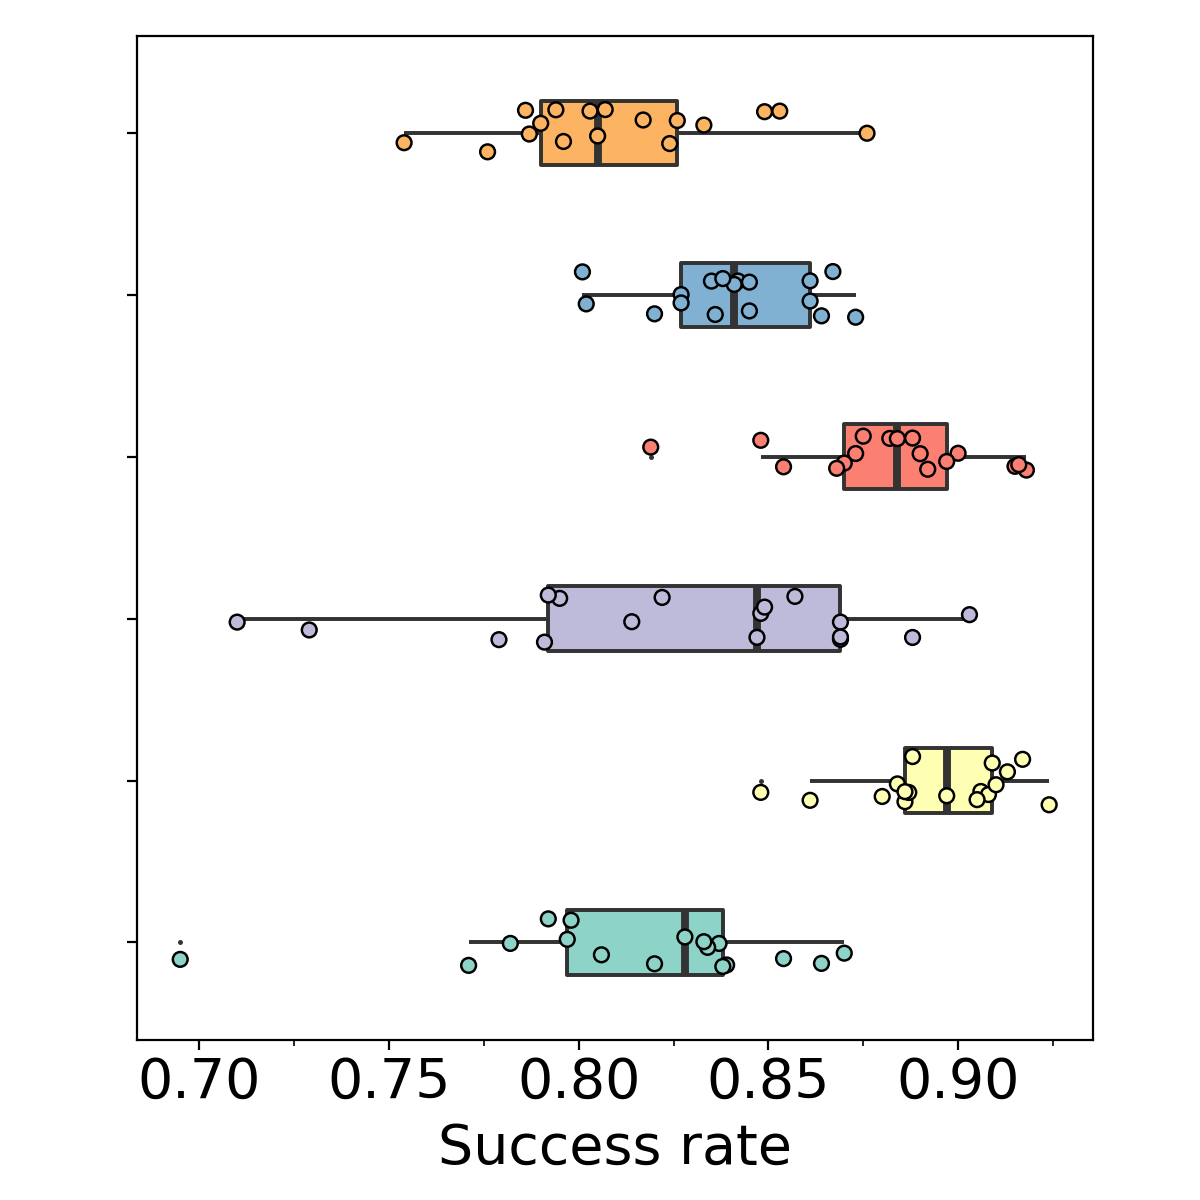

In [12]:
# Subplot-single
box_plot=(ggplot(rewards,aes(x='Dataset',y="Success_rate",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=2.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip() # exchange axis x and y
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(6,6),
       text = element_text(family="sans-serif",size = 20),
       axis_text_y=element_blank(),
)
+labs(x = "", y ="Success rate")
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1)) ## change axis x's angle etc.
)
print(box_plot)

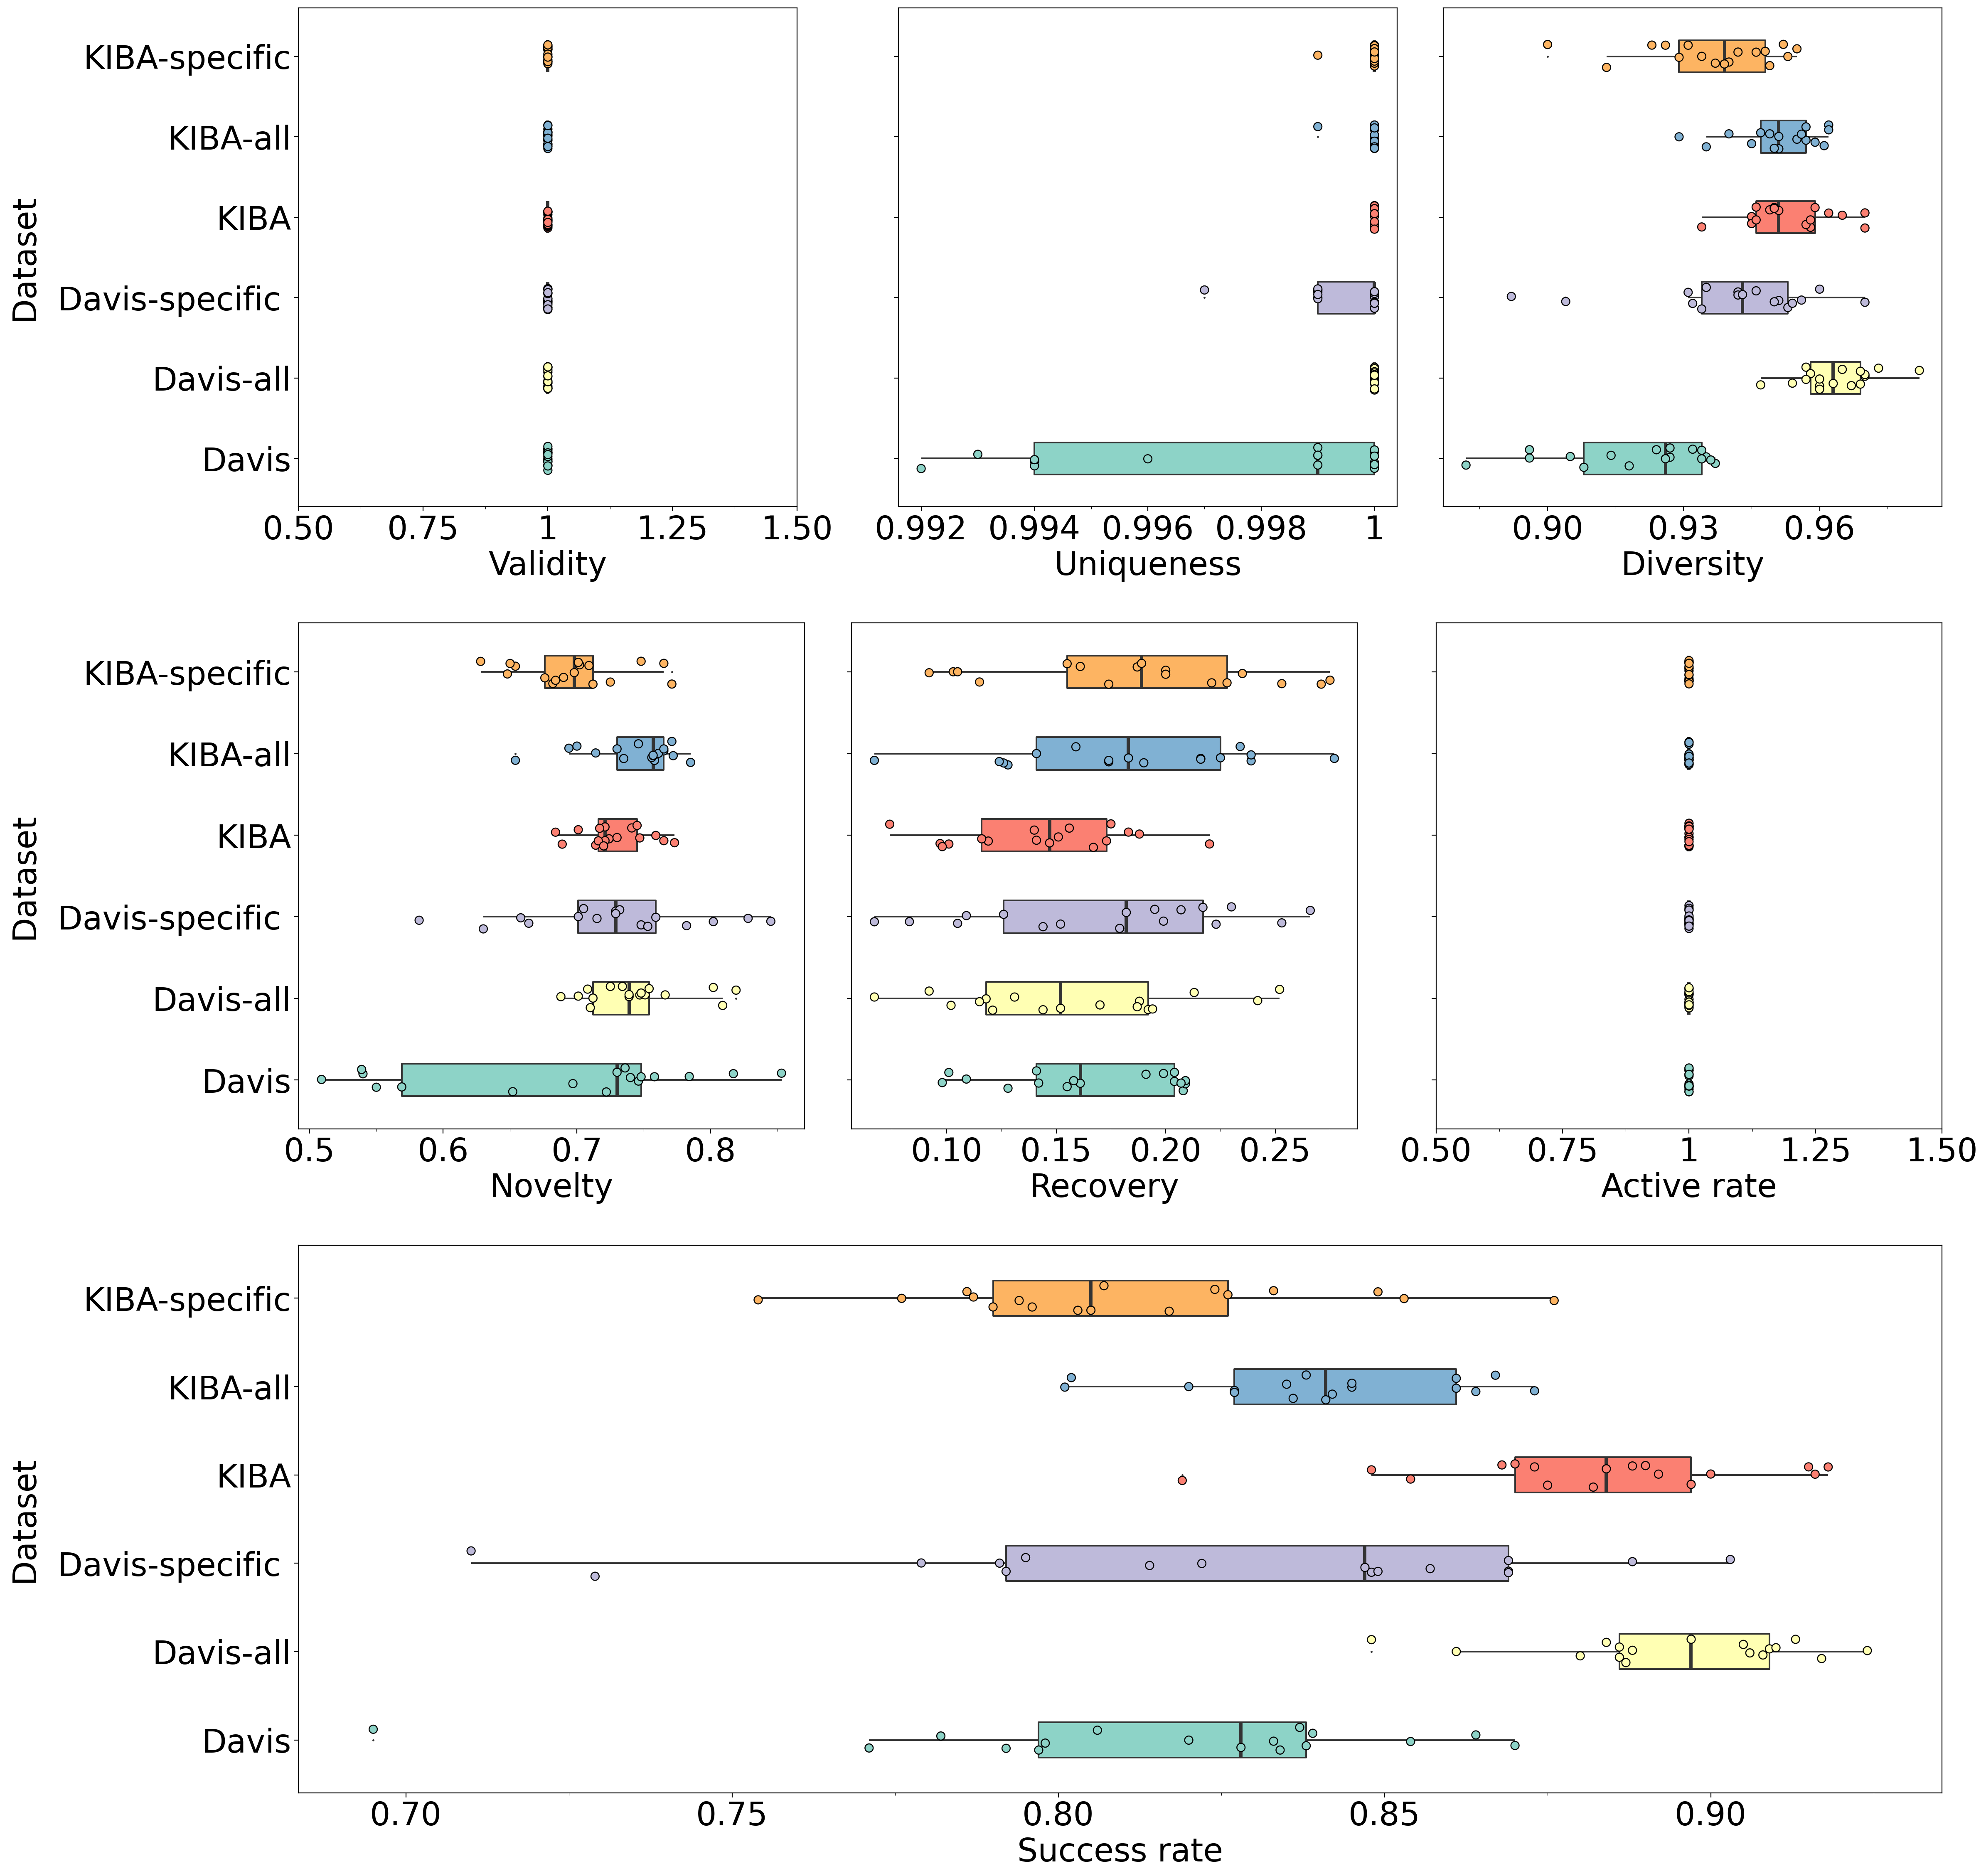

In [13]:
from matplotlib import gridspec
import patchworklib as pw
#plt.figure(figsize=(15, 8))
#plt.subplot(1, 2, 1)
Property = ["Validity", "Uniqueness", "Diversity", "Novelty", "Recovery/Frag", "Recovery/Scaf", "Active_rate", "Success_rate"]
p1 = (ggplot(rewards,aes(x='Dataset',y="Validity",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
)

#plt.subplot(1, 2, 1)
p2 = (ggplot(rewards,aes(x='Dataset',y="Uniqueness",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       axis_text_y=element_blank(),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
+labs(x = "")
)

#fig = (ggplot()+geom_blank(data=rewards)+theme_void()).draw()
#gs = gridspec.GridSpec(1,2)  
#ax1 = fig.add_subplot(gs[0,0])
#ax2 = fig.add_subplot(gs[0,1])
#p = p1._draw_using_figure(fig,[ax1])
#p = p2._draw_using_figure(fig,[ax2])
##plt.tight_layout()

#p.show()

p3 = (ggplot(rewards,aes(x='Dataset',y="Diversity",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       axis_text_y=element_blank(),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
+labs(x = "")
)

p4 = (ggplot(rewards,aes(x='Dataset',y="Novelty",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
)

p5 = (ggplot(rewards,aes(x='Dataset',y="Recovery/Frag",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       axis_text_y=element_blank(),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
+labs(x = "", y="Recovery")
)

p6 = (ggplot(rewards,aes(x='Dataset',y="Active_rate",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       axis_text_y=element_blank(),
       figure_size=(6,6))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
+labs(x = "", y="Active rate")
)

p7 = (ggplot(rewards,aes(x='Dataset',y="Success_rate",fill="Dataset"))
+geom_boxplot(show_legend=False,outlier_size=0.001,size=0.8, width = 0.4)
+geom_jitter(size=3.5,stroke=0.5,position = position_jitter(width=0.15,height=0),shape = "o",show_legend=False)
#+scale_fill_hue(s = 0.70, l = 0.85, h=0.04,color_space='husl')
#+scale_fill_brewer(type="div",palette = "Spectral")
+scale_fill_brewer(type="qual",palette = "Set3"
                   #,direction=1
                   )
+coord_flip()
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=300,
       text = element_text(size = 28),
       figure_size=(9,3))
#+theme(axis_text_x = element_text(
#    angle = 15,
#    hjust = 1.5,
#    vjust = 1))
+labs(y="Success rate")
)

g1 = pw.load_ggplot(p1)
g2 = pw.load_ggplot(p2)
g3 = pw.load_ggplot(p3)
g4 = pw.load_ggplot(p4)
g5 = pw.load_ggplot(p5)
g6 = pw.load_ggplot(p6)
g7 = pw.load_ggplot(p7)
g123 = g1|g2|g3
g456 = g4|g5|g6
g123456 = g123/g456
g1234567 = g123456/g7
g1234567

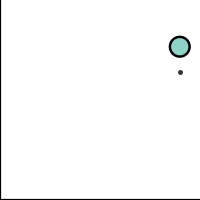

In [14]:
g1234567.savefig("figure/g1234567.png",format="png", dpi=300)
g1234567.savefig("figure/g1234567.pdf",format="pdf", dpi=300)

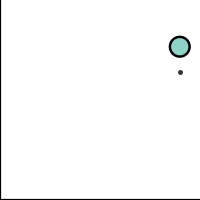

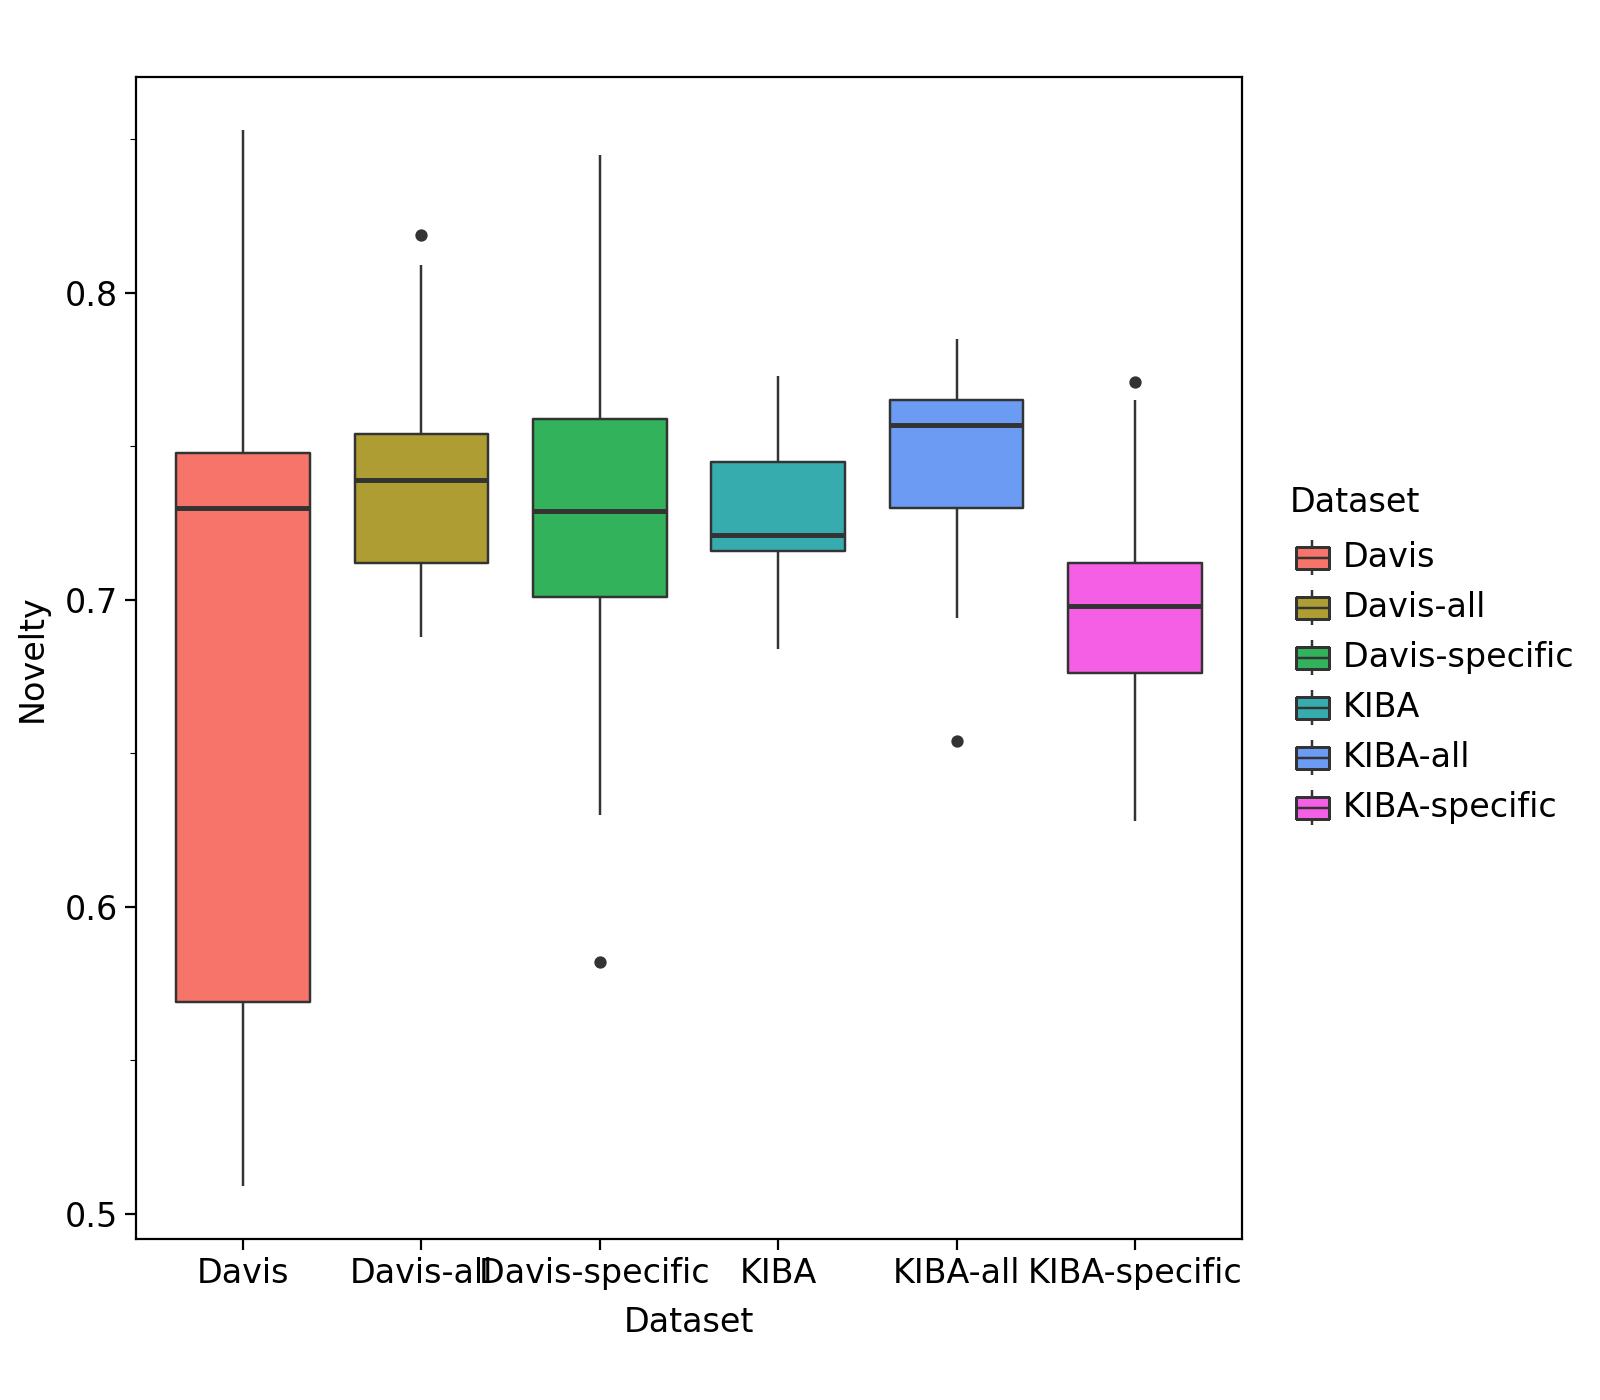

In [15]:
box_plot=(ggplot(rewards,aes(x='Dataset',y="Novelty",fill="Dataset"))
+geom_boxplot(show_legend=True)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(8, 7)))
print(box_plot)

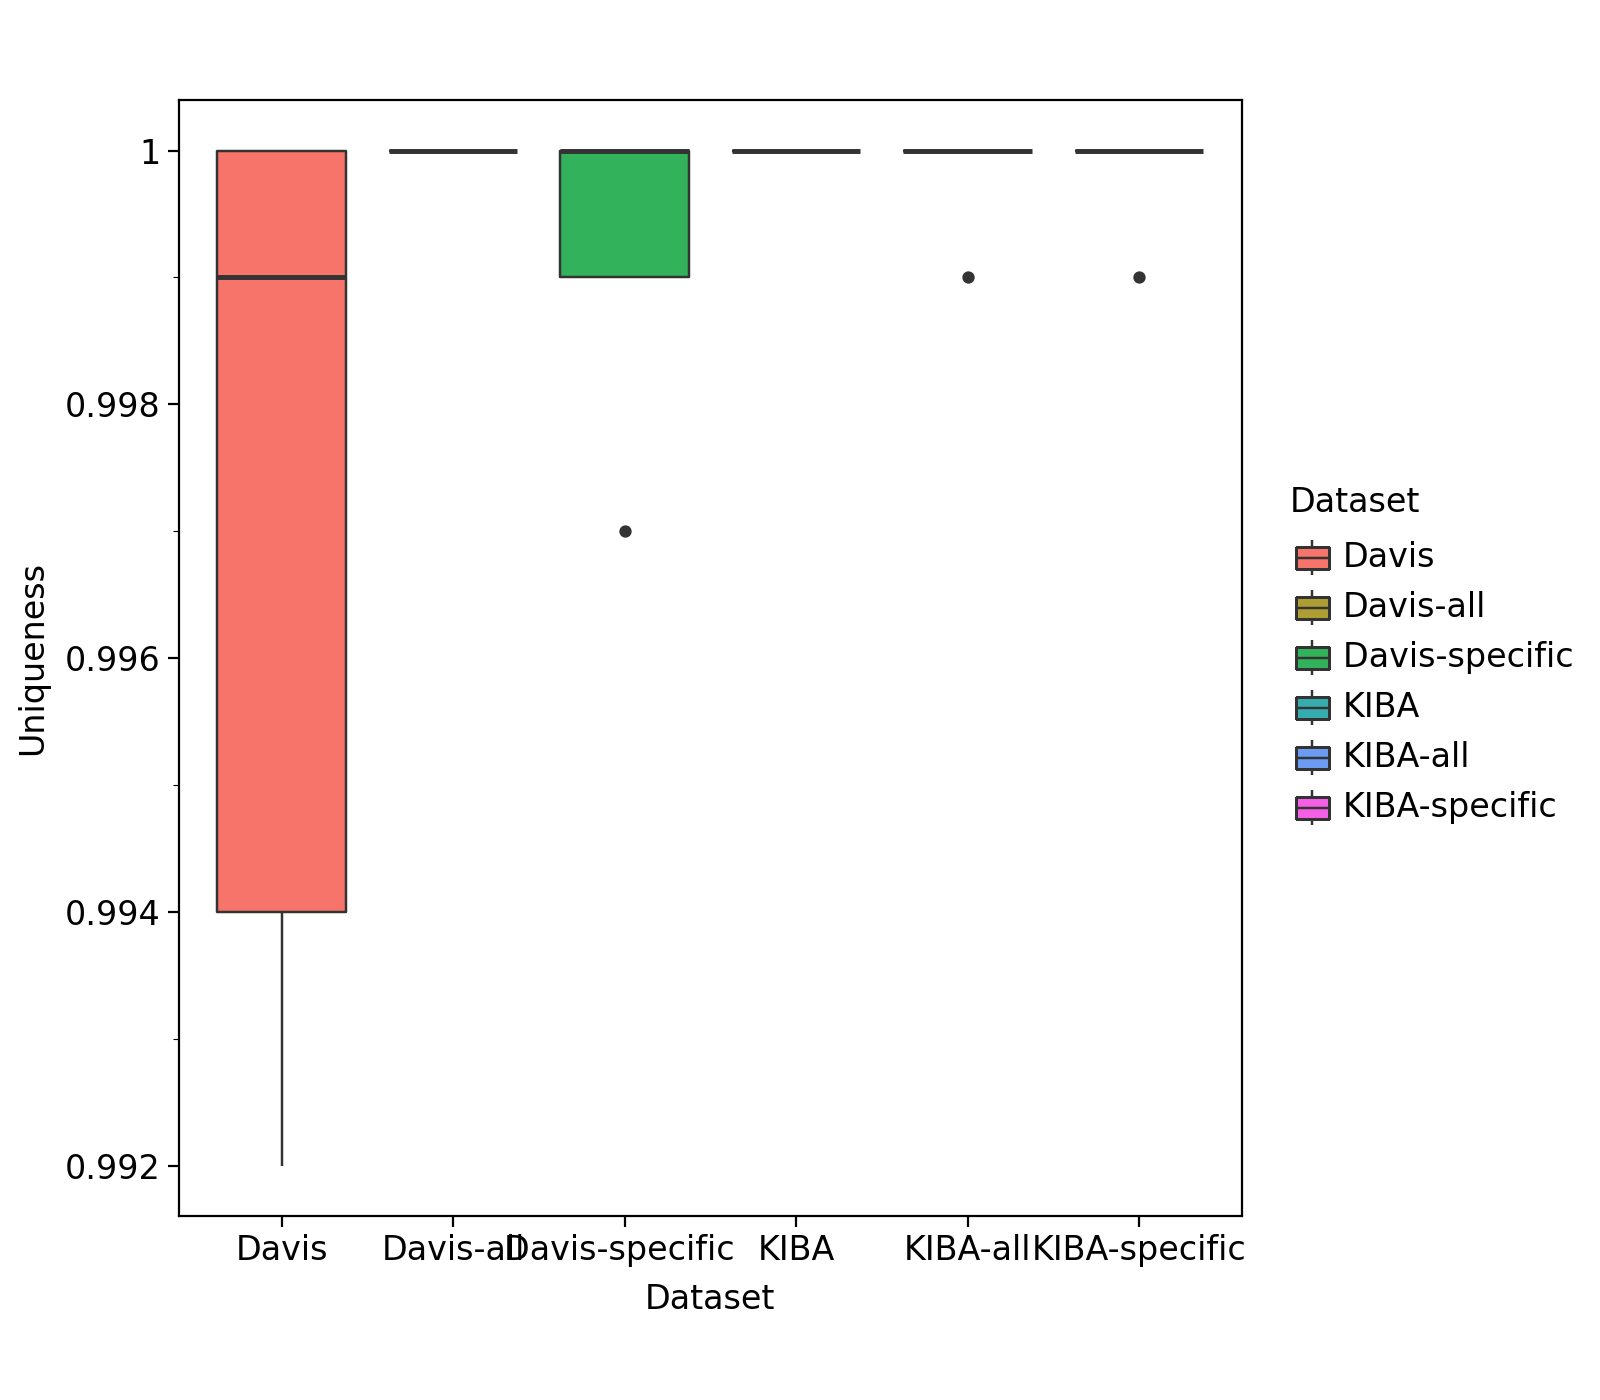

In [16]:
box_plot=(ggplot(rewards,aes(x='Dataset',y="Uniqueness",fill="Dataset"))
+geom_boxplot(show_legend=True)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(8, 7)))
print(box_plot)

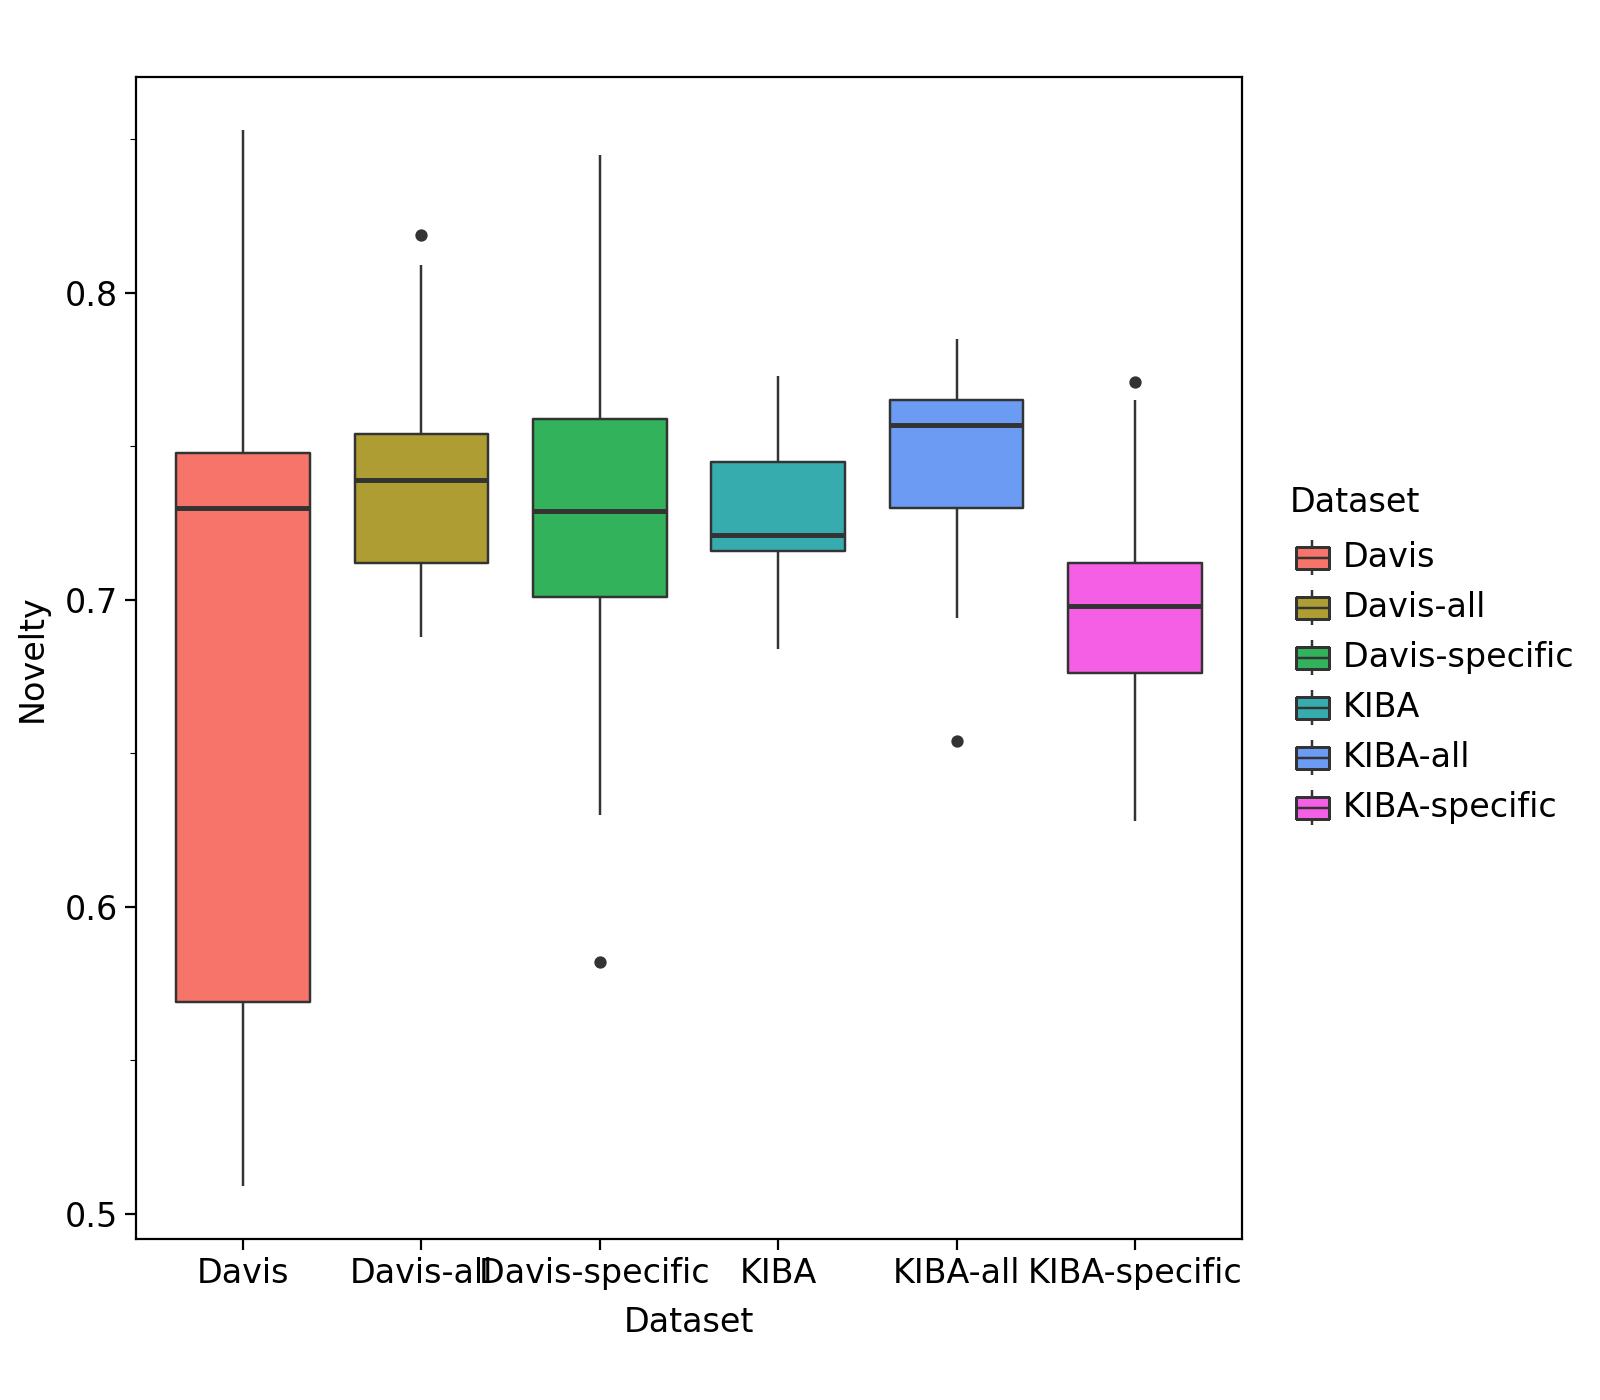

In [17]:
box_plot=(ggplot(rewards,aes(x='Dataset',y="Novelty",fill="Dataset"))
+geom_boxplot(show_legend=True)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(8, 7)))
print(box_plot)

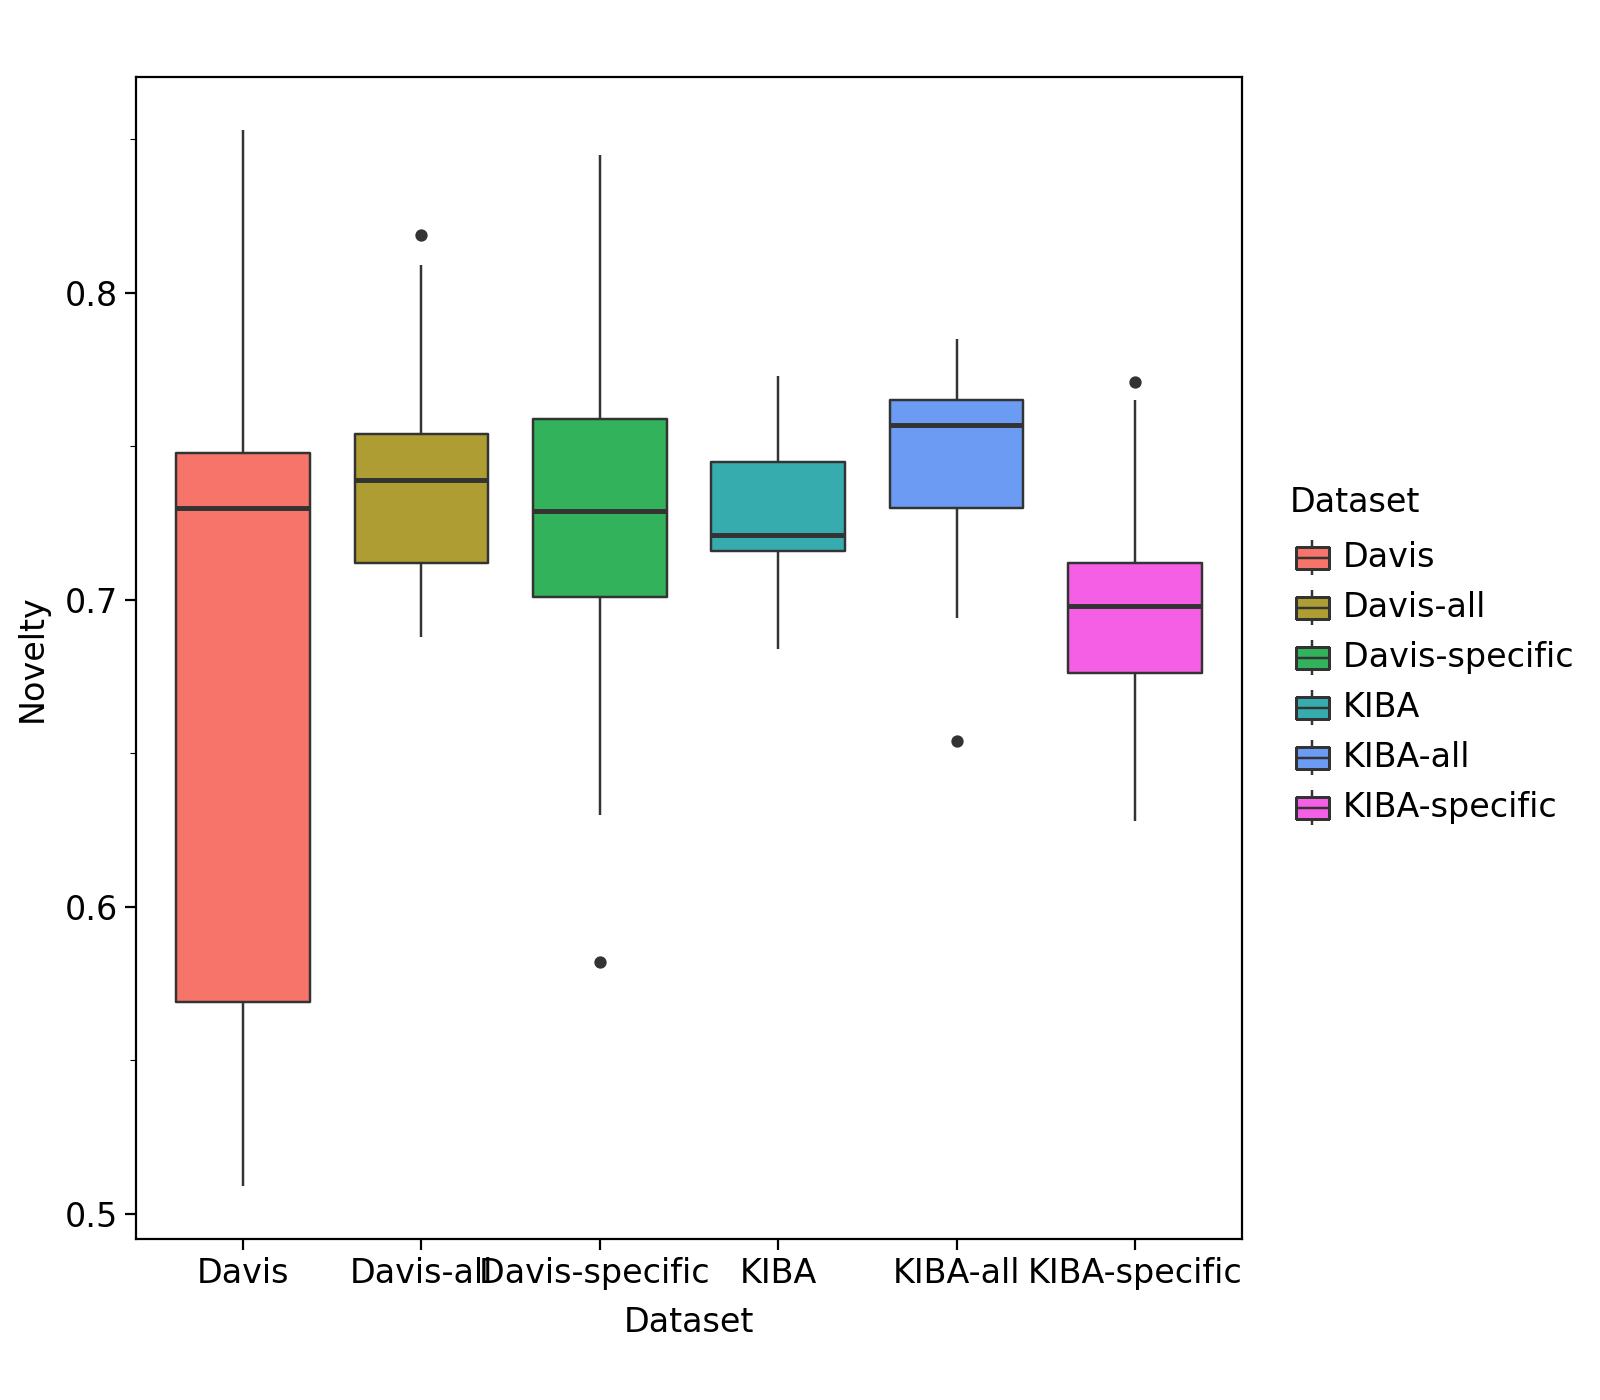

In [18]:
box_plot=(ggplot(rewards,aes(x='Dataset',y="Novelty",fill="Dataset"))
+geom_boxplot(show_legend=True)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(8, 7)))
print(box_plot)

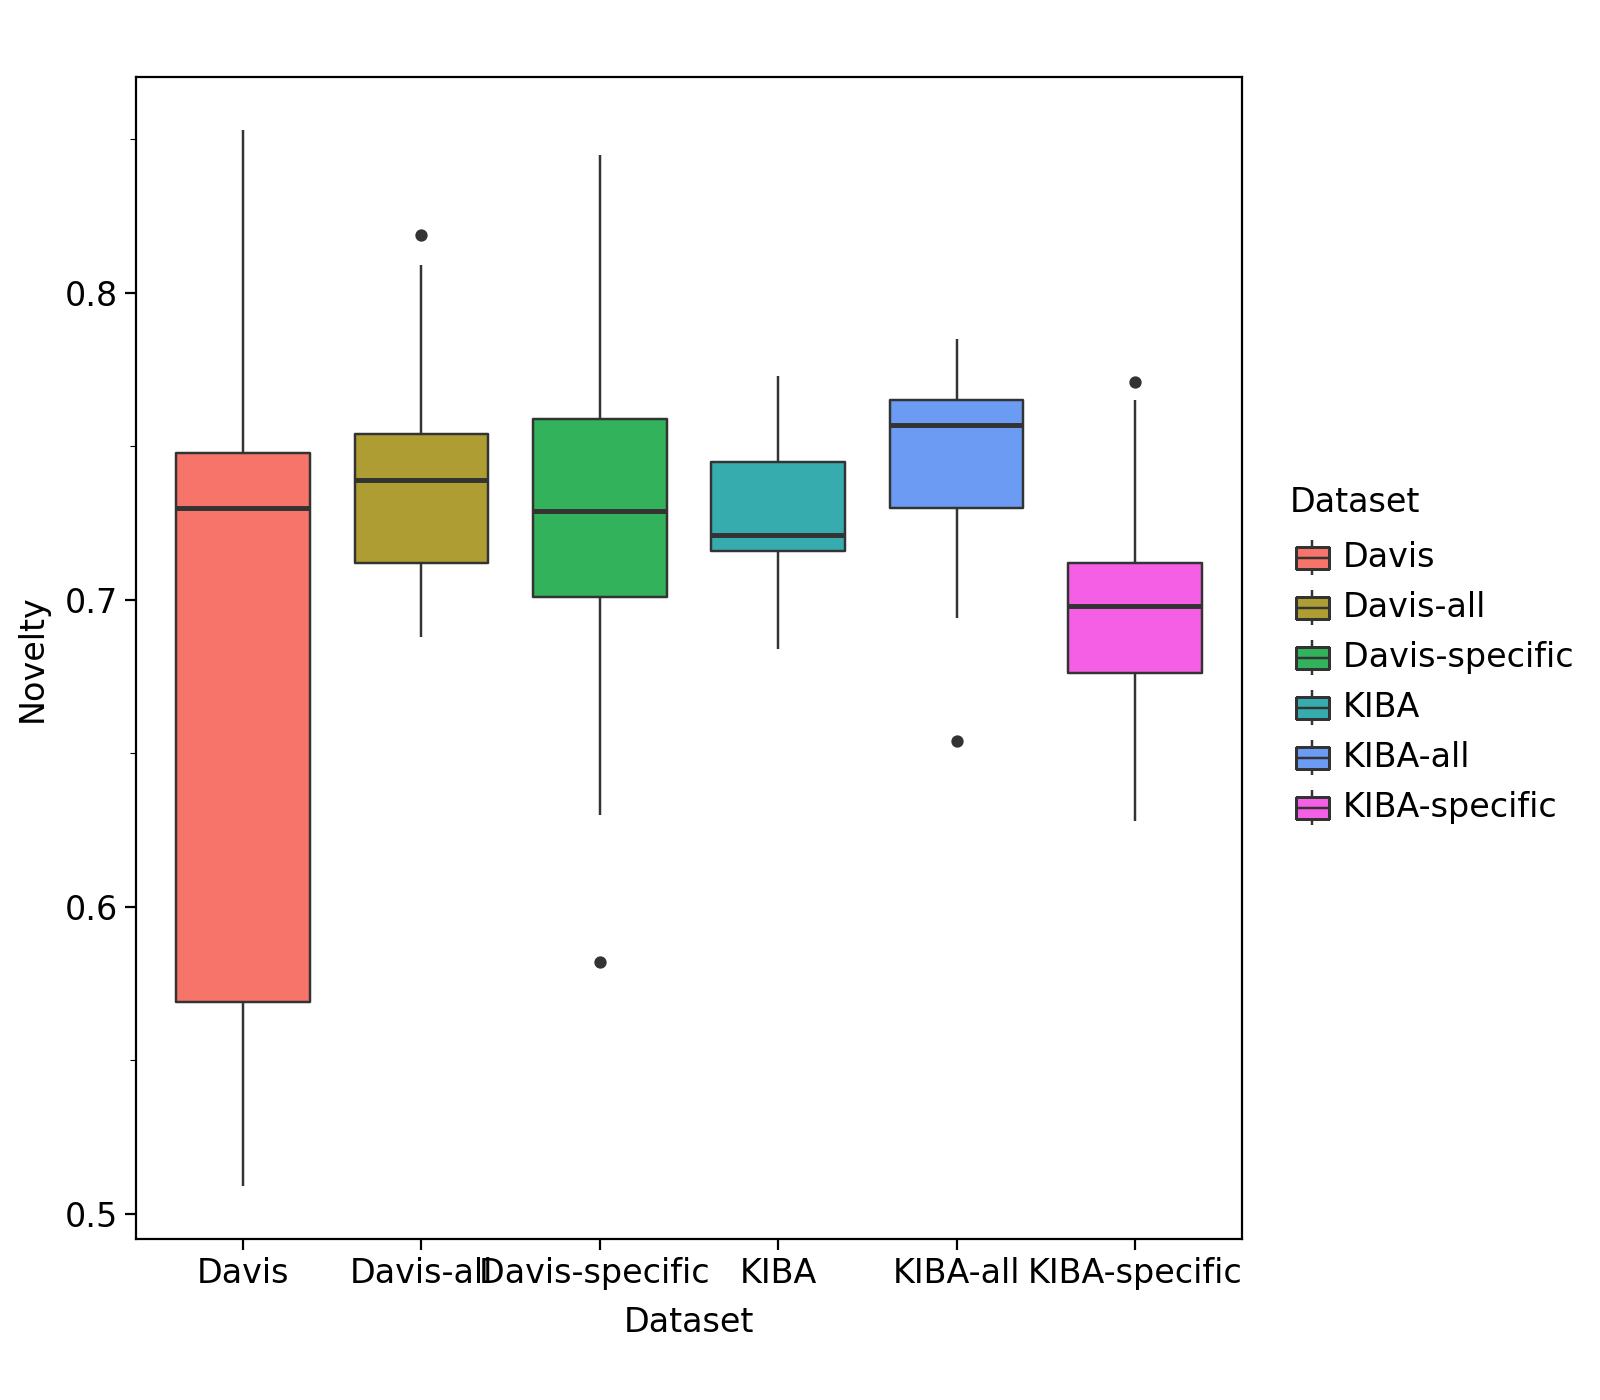

In [19]:
box_plot=(ggplot(rewards,aes(x='Dataset',y="Novelty",fill="Dataset"))
+geom_boxplot(show_legend=True)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(8, 7)))
print(box_plot)

# Plot Molecule Properties

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
import glob
warnings.filterwarnings("ignore")

step_score_list = []
step_score_file = "../data/results/EPIDERMAL_GROWTH_FACTOR_RECEPTOR/davis/17_kinases/run_2024-10-17*/step_score.csv"
step_score_file = glob.glob(step_score_file)
for i in range(6):
    step_score = pd.read_csv(step_score_file[i])
    step_score_list.append(step_score['score'][:500])

step_score_np = np.array(step_score_list)

In [21]:
for i in [0, 1, 3, 4]:
    plt.plot(range(500), step_score_list[i], c='darkgrey')
plt.plot(range(500), step_score_list[5], c='darkgrey', label='Six times')
plt.plot(range(500), np.mean(step_score_np, axis=0), c='r', label='Average')
plt.legend()

In [22]:
import sklearn
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from utils import valid_smiles
from rdkit import Chem, rdBase
rdBase.DisableLog('rdApp.error')


df_lig = pd.read_csv('../evaluator/output/docking-output_bindingdb/bingdingdb_smi_docking/processed_glide-dock_SP_alk_bindingdb_pv-qc.csv')
mask_lig = df_lig['Smiles'].apply(valid_smiles)
df_lig = df_lig[mask_lig]
df_lig['label'] = 0


df_gen = pd.read_csv('../evaluator/output/docking-output_generated/gen_smi_docking/processed_glide-dock_SP_alk_5ftq_davis_all_pv-qc.csv')
mask_gen = df_gen['Smiles'].apply(valid_smiles)
df_gen = df_gen[mask_gen]
df_gen['label'] = 1

space = pd.concat([df_lig, df_gen])
space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))

X = np.array(list(space['fp'].values))
X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
space['component1'] = X_tsne[:, 0]
space['component2'] = X_tsne[:, 1]

In [23]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from metrics.utils import SA, NP


df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

In [24]:
colorset=["#83FF83", "#00e5ff"]
lig_label = 'Bioactive ligands'
gen_label = 'Generated molecules'
# Plot
plt.style.use('default')
plt.figure(figsize=(15, 8))
# plot chemical space
plt.subplot(2, 3, 1)
plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=10, alpha=0.3, label=gen_label, color=colorset[0], rasterized=True)
plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=10, alpha=0.4, label=lig_label, color=colorset[1], rasterized=True)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.legend([gen_label, lig_label], fontsize=10, loc=0)
#sns.despine()
plt.xlim([-90, 90])
plt.ylim([-100, 100])
plt.tight_layout()
plt.subplot(2, 3, 2)
sns.histplot(df_gen['MW'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
sns.histplot(df_lig['MW'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
#sns.despine()
plt.xlabel('Molecular weight', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10, loc=0)
plt.xlim([0, 900])
plt.ylim([0, 0.008])
plt.tight_layout()
# plot distribution of docking score
plt.subplot(2, 3, 3)
sns.histplot(df_gen['Docking Score'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0]) 
sns.histplot(df_lig['Docking Score'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
#sns.despine()
plt.xlabel('Docking score (kcal/mol)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10, loc=0)
plt.xlim([-14, -3])
plt.ylim([0, 0.60])
plt.tight_layout()
plt.subplot(2, 3, 4)
sns.histplot(df_gen['QED'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0]) 
sns.histplot(df_lig['QED'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
#sns.despine()
plt.xlabel('QED', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10, loc=0)
#plt.xlim([0, 1])
plt.ylim([0, 5.0])
plt.tight_layout()
plt.subplot(2, 3, 5)
sns.histplot(df_gen['SA'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
sns.histplot(df_lig['SA'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
#sns.despine()
plt.xlabel('SA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10, loc=0)
plt.xlim([0, 8])
plt.ylim([0, 0.90])
plt.tight_layout()
# plot distribution of properties
plt.subplot(2, 3, 6)
sns.histplot(df_gen['logP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])  
sns.histplot(df_lig['logP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
#sns.despine()
plt.xlabel('logP', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10, loc=0)
plt.xlim([-4, 10])
plt.ylim([0, 0.55])
plt.tight_layout()

plt.savefig('figure/test_ALK.pdf', format='pdf', dpi=600)

## Here is the collated function code

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
import warnings
import sklearn
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from utils import valid_smiles
from rdkit import Chem, rdBase
from rdkit import Chem
from rdkit.Chem import Descriptors
from metrics.utils import SA, NP
rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore")


def kinase_dict(protein_name, dtype=None, kinase_file="../data/kinase/kinase_info.tsv"):
    """
    Give kinase name and dtype, and return kinase KIBA ID, uniprot name or uniprot sequence etc.
    dtype can be "GENE", "SEQ", "KIBA_ID", "Uniprot_NAME".
    """
    kinase = pd.read_csv(kinase_file, sep="\t")
    kinase_dict = kinase.groupby(["Binding_NAME"]).apply(lambda x: x[["KIBA_ID","GENE","SEQ","Uniprot_NAME"]].to_dict("list")).to_dict()
    if dtype is not None:
        kinase_info = kinase_dict[protein_name][dtype][0]
        return kinase_info
    else:
        print("Require only 'GENE', 'KIBA_ID', 'SEQ' or 'Uniprot_NAME' as dtype!")

In [ ]:
def plot_properties(protein_name, dataset="davis", dtype="all", out_path="figure",
                    kinase_info_path="../data/kinase/kinase_info.tsv",
                    ligands_path='../../evaluator/output/docking-output_bindingdb/bingdingdb_smi_docking/',
                    gen_path='../../evaluator/output/docking-output_generated/gen_smi_docking/'):
    """
    PLot images for one protein given dataset["davis", "kiba"], dtype["all", "specific", "fusion"] and file_path
    """
    protein_name = kinase_dict(protein_name=protein_name, dtype="GENE",
                               kinase_file=kinase_info_path).lower().split("/")[0]
    
    lig_file = ligands_path + "/*" + protein_name + "*csv"
    lig_file = glob.glob(lig_file)
    gen_file = gen_path + "/*" + protein_name + "*" + dataset + "*" + dtype + "*csv"
    gen_file = glob.glob(gen_file)
    assert len(lig_file) == len(gen_file)
    for i in range(len(lig_file)):
        df_lig = pd.read_csv(lig_file[i])
        mask_lig = df_lig['Smiles'].apply(valid_smiles)
        df_lig = df_lig[mask_lig]
        df_lig['label'] = 0

        df_gen = pd.read_csv(gen_file[i])
        mask_gen = df_gen['Smiles'].apply(valid_smiles)
        df_gen = df_gen[mask_gen]
        df_gen['label'] = 1

        space = pd.concat([df_lig, df_gen])
        space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))

        X = np.array(list(space['fp'].values))
        X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
        space['component1'] = X_tsne[:, 0]
        space['component2'] = X_tsne[:, 1]

        df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
        df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
        df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
        df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
        df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

        df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
        df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
        df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
        df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
        df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

        lig_label = 'Bioactive ligands'
        gen_label = 'Generated molecules'

        # Plot
        plt.style.use('default')
        plt.figure(figsize=(15, 8))

        # plot chemical space
        plt.subplot(2, 3, 1)
        plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=12, alpha=0.6, label=gen_label, color='#6c905e')
        plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=12, alpha=0.4, label=lig_label, color='#B6D0E6')
        plt.xlabel('Component 1', fontsize=14)
        plt.ylabel('Component 2', fontsize=14)
        plt.legend([gen_label, lig_label], fontsize=10, loc=0)
        #sns.despine()
        plt.tight_layout()

        plt.subplot(2, 3, 2)
        sns.histplot(df_gen['MW'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
        sns.histplot(df_lig['MW'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
        #sns.despine() # delete the bondline
        plt.xlabel('Molecular weight', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.tight_layout()

        # plot distribution of docking score
        plt.subplot(2, 3, 3)
        sns.histplot(df_gen['Docking Score'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
        sns.histplot(df_lig['Docking Score'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
        #sns.despine()
        plt.xlabel('Docking score (kcal/mol)', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.xlim([-13, -3])
        plt.tight_layout()

        plt.subplot(2, 3, 4)
        sns.histplot(df_gen['QED'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
        sns.histplot(df_lig['QED'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
        #sns.despine()
        plt.xlabel('QED', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.tight_layout()

        plt.subplot(2, 3, 5)
        sns.histplot(df_gen['SA'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
        sns.histplot(df_lig['SA'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
        #sns.despine()
        plt.xlabel('SA', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.tight_layout()

        # plot distribution of properties
        plt.subplot(2, 3, 6)
        sns.histplot(df_gen['logP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
        sns.histplot(df_lig['logP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
        #sns.despine()
        plt.xlabel('logP', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.tight_layout()

        if not os.path.exists(out_path):
            os.mkdir(out_path)
        out_path = os.path.join(out_path, gen_file[i].split("/")[-1].split(".")[0]+".svg")
        plt.savefig(out_path, format='svg', dpi=600)

In [ ]:
def plot_properties_2(protein_name, colorset=["#83FF83", "#00e5ff"], out_format="svg", out_path="figure",
                      kinase_info_path="../data/kinase/kinase_info.tsv",
                      ligands_path='../../evaluator/output/docking-output_bindingdb/bingdingdb_smi_docking/',
                      gen_path='../../evaluator/output/docking-output_generated/gen_smi_docking/'):
    """
    -PLot images for one protein containing dataset-dtype["davis-all", "bioactive ligands"] and file_path
    -What's NEW:
    --change colorsets
    --set xlim. ylim for most properties.
    --add argument "colorset"
    --change tsne plot parameters "s" and "alpha"
    --add argument "out_format"
    --add `rasterized=True` in plt.scatter() to reduce image size, especially for .pdf image
    """
    protein_name = kinase_dict(protein_name=protein_name, dtype="GENE",
                               kinase_file=kinase_info_path).lower().split("/")[0]
    
    lig_file = ligands_path + "/*" + protein_name + "*csv"
    lig_file = glob.glob(lig_file)
    gen_file = gen_path + "/*" + protein_name + "*" + "davis" + "*" + "all" + "*csv"
    gen_file = glob.glob(gen_file)

    assert len(lig_file) == len(gen_file)
    for i in range(len(lig_file)):
        df_lig = pd.read_csv(lig_file[i])
        mask_lig = df_lig['Smiles'].apply(valid_smiles)
        df_lig = df_lig[mask_lig]
        df_lig['label'] = 0

        df_gen = pd.read_csv(gen_file[i])
        mask_gen = df_gen['Smiles'].apply(valid_smiles)
        df_gen = df_gen[mask_gen]
        df_gen['label'] = 1

        space = pd.concat([df_lig, df_gen])
        space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))

        X = np.array(list(space['fp'].values))
        X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
        space['component1'] = X_tsne[:, 0]
        space['component2'] = X_tsne[:, 1]

        df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
        df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
        df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
        df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
        df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

        df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
        df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
        df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
        df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
        df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

        lig_label = 'Bioactive ligands'
        gen_label = 'Generated molecules'

        # Plot
        plt.style.use('default')
        plt.figure(figsize=(15, 8))

        # plot chemical space
        plt.subplot(2, 3, 1)
        plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=10, alpha=0.3, label=gen_label, color=colorset[0], rasterized=True)
        plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=10, alpha=0.4, label=lig_label, color=colorset[1], rasterized=True)
        plt.xlabel('Component 1', fontsize=14)
        plt.ylabel('Component 2', fontsize=14)
        plt.legend([gen_label, lig_label], fontsize=10, loc=0)
        #sns.despine()
        plt.xlim([-90, 90])
        plt.ylim([-100, 100])
        plt.tight_layout()

        plt.subplot(2, 3, 2)
        sns.histplot(df_gen['MW'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
        sns.histplot(df_lig['MW'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
        #sns.despine()
        plt.xlabel('Molecular weight', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.xlim([0, 900])
        plt.ylim([0, 0.008])
        plt.tight_layout()

        # plot distribution of docking score
        plt.subplot(2, 3, 3)
        sns.histplot(df_gen['Docking Score'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0]) 
        sns.histplot(df_lig['Docking Score'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
        #sns.despine()
        plt.xlabel('Docking score (kcal/mol)', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.xlim([-14, -3])
        plt.ylim([0, 0.60])
        plt.tight_layout()

        plt.subplot(2, 3, 4)
        sns.histplot(df_gen['QED'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0]) 
        sns.histplot(df_lig['QED'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
        #sns.despine()
        plt.xlabel('QED', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        #plt.xlim([0, 1])
        plt.ylim([0, 5.0])
        plt.tight_layout()

        plt.subplot(2, 3, 5)
        sns.histplot(df_gen['SA'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
        sns.histplot(df_lig['SA'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
        #sns.despine()
        plt.xlabel('SA', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.xlim([0, 8])
        plt.ylim([0, 0.90])
        plt.tight_layout()

        # plot distribution of properties
        plt.subplot(2, 3, 6)
        sns.histplot(df_gen['logP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])  
        sns.histplot(df_lig['logP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
        #sns.despine()
        plt.xlabel('logP', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.legend(fontsize=10, loc=0)
        plt.xlim([-4, 10])
        plt.ylim([0, 0.55])
        plt.tight_layout()


        if not os.path.exists(out_path):
            os.mkdir(out_path)
        out_path = os.path.join(out_path, gen_file[i].split("/")[-1].split("_")[3]+"_"+gen_file[i].split("/")[-1].split("_")[4]+"."+out_format)
        plt.savefig(out_path, format=out_format, dpi=600)

In [ ]:
def plot_specific_properties(protein_name_list, dataset="davis", dtype="all", property="docking", out_path="figure",
                             kinase_info_path="../data/kinase/kinase_info.tsv",
                             ligands_path='../../evaluator/output/docking-output_bindingdb/bingdingdb_smi_docking/',
                             gen_path='../../evaluator/output/docking-output_generated/gen_smi_docking/'):
    """
    PLot images for many proteins given dataset["davis", "kiba"], dtype["all", "specific", "fusion"], property["docking", "sa", "logp", "mw", "qed", "np", "tsne"] and file_path
    """    
    # Plot
    plt.style.use('default')
    if 16 < len(protein_name_list) <=20:
        plt.figure(figsize=(25, 16))
    else:    
        plt.figure(figsize=(20, 16))
    for p in range(len(protein_name_list)):
        print(protein_name_list[p])
        protein_name = kinase_dict(protein_name=protein_name_list[p], dtype="GENE",
                                   kinase_file=kinase_info_path).lower().split("/")[0]
    
        lig_file = ligands_path + "/*" + protein_name + "*csv"
        lig_file = glob.glob(lig_file) #return list
        gen_file = gen_path + "/*" + protein_name + "*" + dataset + "*" + dtype + "*csv"
        gen_file = glob.glob(gen_file)
        assert len(lig_file) == len(gen_file)

        df_lig = pd.read_csv(lig_file[0])
        mask_lig = df_lig['Smiles'].apply(valid_smiles)
        df_lig = df_lig[mask_lig]
        df_lig['label'] = 0

        df_gen = pd.read_csv(gen_file[0])
        mask_gen = df_gen['Smiles'].apply(valid_smiles)
        df_gen = df_gen[mask_gen]
        df_gen['label'] = 1

        lig_label = protein_name.upper()+'-Bioactive ligands'
        gen_label = protein_name.upper()+'-Generated molecules'
        if property.lower() == "tsne":
            # plot chemical space
            space = pd.concat([df_lig, df_gen])
            space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))
            X = np.array(list(space['fp'].values))
            X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
            space['component1'] = X_tsne[:, 0]
            space['component2'] = X_tsne[:, 1]
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=12, alpha=0.6, label=gen_label, color='#6c905e')
            plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=12, alpha=0.4, label=lig_label, color='#B6D0E6')
            plt.xlabel('Component 1', fontsize=14)
            plt.ylabel('Component 2', fontsize=14)
            plt.legend([gen_label, lig_label], fontsize=10, loc=0)
            #sns.despine()
            plt.tight_layout()

        elif property.lower() == "docking":
            # plot distribution of docking score
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['Docking Score'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['Docking Score'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('Docking score (kcal/mol)', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([-13, -3])
            plt.tight_layout()

        elif property.lower() == "mw":
            df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
            df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['MW'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['MW'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('Molecular weight', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.tight_layout()

        elif property.lower() == "logp":
            df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
            df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['logP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['logP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('logP', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.tight_layout()

        elif property.lower() == "qed":
            df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
            df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['QED'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['QED'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('QED', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.tight_layout()

        elif property.lower() == "sa":
            df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
            df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['SA'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['SA'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('SA', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.tight_layout()
        
        elif property.lower() == "np":
            df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))
            df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['NP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#6c905e')
            sns.histplot(df_lig['NP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color='#2f7ab9')
            #sns.despine()
            plt.xlabel('NP', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.tight_layout()
        

    if not os.path.exists(out_path):
        os.mkdir(out_path)
    out_path = os.path.join(out_path, dataset+"_"+dtype+"_"+property+".svg")
    plt.savefig(out_path, format='svg', dpi=600)

In [ ]:
def plot_specific_properties_2(protein_name_list, property="docking", colorset=["#83FF83", "#00e5ff"], out_format="svg", out_path="figure",
                               kinase_info_path="../data/kinase/kinase_info.tsv",
                               ligands_path='../../evaluator/output/docking-output_bindingdb/bingdingdb_smi_docking/',
                               gen_path='../../evaluator/output/docking-output_generated/gen_smi_docking/'):
    """
    -PLot images for many proteins including dataset-dtype["davis-all", "bioactive ligands"], property["docking", "sa", "logp", "mw", "qed", "np", "tsne"] and file_path
    -What's NEW:
    --change colorset
    --set xlim and ylim for most properties
    --add argument "colorset"
    --change tsne plot parameters "s" and "alpha"
    ## --change save format to .pdf
    --add argument "out_format"
    --add `rasterized=True` in plt.scatter() to reduce image size, especially for .pdf image
    """    
    # Plot
    plt.style.use('default')
    if 16 < len(protein_name_list) <=20:
        plt.figure(figsize=(25, 16))
    else:    
        plt.figure(figsize=(20, 16))
    for p in range(len(protein_name_list)):
        print(protein_name_list[p])
        protein_name = kinase_dict(protein_name=protein_name_list[p], dtype="GENE",
                                   kinase_file=kinase_info_path).lower().split("/")[0]
    
        lig_file = ligands_path + "/*" + protein_name + "*csv"
        lig_file = glob.glob(lig_file) #return list
        gen_file = gen_path + "/*" + protein_name + "*" + "davis" + "*" + "all" + "*csv"
        gen_file = glob.glob(gen_file)
        assert len(lig_file) == len(gen_file)

        df_lig = pd.read_csv(lig_file[0])
        mask_lig = df_lig['Smiles'].apply(valid_smiles)
        df_lig = df_lig[mask_lig]
        df_lig['label'] = 0

        df_gen = pd.read_csv(gen_file[0])
        mask_gen = df_gen['Smiles'].apply(valid_smiles)
        df_gen = df_gen[mask_gen]
        df_gen['label'] = 1

        lig_label = protein_name.upper()+'-Bioactive ligands'
        gen_label = protein_name.upper()+'-Generated molecules'

        if property.lower() == "tsne":
            # plot chemical space
            space = pd.concat([df_lig, df_gen])
            space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))
            X = np.array(list(space['fp'].values))
            X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
            space['component1'] = X_tsne[:, 0]
            space['component2'] = X_tsne[:, 1]
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=10, alpha=0.3, label=gen_label, color=colorset[0], rasterized=True)
            plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=10, alpha=0.4, label=lig_label, color=colorset[1], rasterized=True)
            plt.xlabel('Component 1', fontsize=14)
            plt.ylabel('Component 2', fontsize=14)
            plt.legend([gen_label, lig_label], fontsize=10, loc=0)
            #sns.despine()
            plt.xlim([-90, 90])
            plt.ylim([-100, 100])
            plt.tight_layout()

        elif property.lower() == "docking":
            # plot distribution of docking score
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['Docking Score'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['Docking Score'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('Docking score (kcal/mol)', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([-14, -3])
            plt.ylim([0, 0.60])
            plt.tight_layout()

        elif property.lower() == "mw":
            df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
            df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['MW'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['MW'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('Molecular weight', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([0, 900])
            plt.ylim([0, 0.008])
            plt.tight_layout()

        elif property.lower() == "logp":
            df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
            df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['logP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['logP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('logP', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([-4, 10])
            plt.ylim([0, 0.55])
            plt.tight_layout()

        elif property.lower() == "qed":
            df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
            df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['QED'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['QED'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('QED', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            #plt.xlim([0, 1])
            plt.ylim([0, 5.0])
            plt.tight_layout()

        elif property.lower() == "sa":
            df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
            df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['SA'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['SA'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('SA', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([0, 8])
            plt.ylim([0, 0.90])
            plt.tight_layout()
        
        elif property.lower() == "np":
            df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))
            df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))
            if 16 < len(protein_name_list) <=20:
                plt.subplot(4, 5, p+1)
            else:    
                plt.subplot(4, 4, p+1)
            sns.histplot(df_gen['NP'], label=gen_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[0])
            sns.histplot(df_lig['NP'], label=lig_label, kde=True, stat="density", kde_kws=dict(cut=3),
                alpha=.4, edgecolor=(1, 1, 1, .4), color=colorset[1])
            #sns.despine()
            plt.xlabel('NP', fontsize=14)
            plt.ylabel('Density', fontsize=14)
            plt.legend(fontsize=10, loc=0)
            plt.xlim([-5, 4])
            plt.ylim([0, 1.7])
            plt.tight_layout()
        
        
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    out_path = os.path.join(out_path, property+"."+out_format)
    plt.savefig(out_path, format=out_format, dpi=600)

# Plot Highlight Molecules Match to Ligands

In [25]:
# plot highlight molecules match to ligands
from metrics.utils import compute_scaffold
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import warnings
warnings.filterwarnings("ignore")
from rdkit.Chem.Scaffolds import MurckoScaffold


#smi_select = ['COc1cccc2[nH]c(C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]3CCNC3=O)C(=O)CO)cc12', \
#              'Cc1ccc(-n2sc(=O)n(Cc3ccc(F)cc3)c2=O)cc1', 'CCCOc1cc(Cl)cc(-c2cc(-c3ccccc3C#N)cn(-c3cccnc3)c2=O)c1']
smi_select = ['C1[C@H](C)O[C@@H](C)CN1c2ncnc(c2)-c(n[nH]3)c(c34)cc(cc4)OC5(C)CC5', 'FC(F)(F)c1cc(ccc1)Oc(c(Cl)c2)ccc2Nc3ncnc(c34)ccn4CCNC(=O)CC(C)(O)C',
              'CC(C)(C1)CNC(=O)c(c12)sc(Nc3c(F)cc(I)cc3)c2C(=O)N[C@H]4C[NH2+]CCC4', 'Fc1cc(I)ccc1Nc(c(F)c2F)c(cc2)-c3nnc(o3)NCC[NH3+]',
              'c1cccc(c12)c(c[nH]2)CCNc(c3C(=O)[O-])ccc(c3)C(=O)OC', 'c1ccc(S([O-])(=O)=O)c(c12)c(ccc2)Nc3ccccc3',
              'c1nc[nH]c1/C=C(\C(=O)N2)c(c23)cc(cc3)OC', 'Fc1cc(F)cc(c1)Cc(cc2)cc(c23)c(n[nH]3)NC(=O)c4c(N[C@H]5CC[C@H](O)CC5)cc(cc4)N6CC[NH+](C)CC6',
              'c1c(F)ccc(C(=O)NC)c1[C@@H](C)Oc2c(N)ncc(n2)-c3c(OC)nccc3', 'n1ccnc(c12)ccc(c2)/C=C(/C3=O)SC([N-]3)=O']
#ID = [22, 3327, 34]
ID = ["-lrrk2_A1N_1750", "-egfr_03P_1611", "-mek1_77D_1", "-mek2_LUG_982", "-cdk2_80E_2978", "-cdk2_2AN_766", "-cdk2_SU9_811", "-alk_U4W_4661", "-alk_YPW_2955", "-pi3kcg_QYT_1770"]
#smi_match = ['O=C(CNCc1ccccc1NC(=O)NCc1ccc[nH]c1=O)Nc1ccccc1', \
#             'O=S(=O)(Cc1ccccc1)c1ccccc1CNC1=NS(=O)(=O)c2ccccc21', 'O=c1[nH]cccc1CSc1nnc(NCc2ccco2)cc1OCc1ccccc1']
smi_match = ['COc1cccc(c1)-c(n[nH]c2=O)c(c23)cc(cc3)N4CCC[C@@H]4CO', 'C1CCCCCN1S(=O)(=O)c2ccc(cc2)Nc(ncn3)c(c34)cc(cc4)-c5cccnc5',
             '[NH3+][C@H](C1)[C@@H](O)CN1C(=O)c2cc(-c3ccc(F)cc3)sc2N4CCCCC4', 'O=[N+]([O-])c(c1)cccc1C(=O)NC[C@@H](c2cccnc2)N3CCN(CC3)c4cc[nH]c4',
             'c1cccc(NC2=O)c1[C@]23N[C@@H](C3)C(=O)NCCc(c[nH]4)c(c45)cccc5', 'NC(=O)c(cc1)cc(c12)c(c[nH]2)CCNC(=O)Cc3cccc(Cl)c3',
             'Cc1cccc(c1)NC(=O)Nc(n[nH]2)c(c23)ccc(n3)Br', 'c1cnccc1CNC(=O)c(n[nH]2)c(c23)C[N@H+](CC3)Cc4cccs4',
             'OC[C@@H]1CC[N@H+](CC1)Cc2cccc(c2)-c(ccn3)c(c34)cc[nH]4', 'CC(=O)NCc1noc(n1)-c(c2)ncc(c23)n(C)c(=O)n3C']

# Set png or svg paremeters
do_png = rdMolDraw2D.MolDrawOptions()
do_png.bondLineWidth = 5
do_png.highlightRadius = 0.4
do_png.highlightBondWidthMultiplier=4
do_png.fixedBondLength = 40
#do_png.fixedScale = 0.95
do_png.rotate = 30

do_svg = rdMolDraw2D.MolDrawOptions()
do_svg.bondLineWidth = 1
do_svg.highlightRadius = 0.2
do_svg.highlightBondWidthMultiplier=18
do_svg.fixedBondLength = 7
#do_png.fixedScale = 0.95
do_svg.rotate = 30

for i, smi in enumerate(smi_select):
    mol = Chem.MolFromSmiles(smi)
    sca = MurckoScaffold.GetScaffoldForMol(mol)
    # Draw.MolToImage(mol, size=(300, 300), highlightSubstructs=[sca])
    hit_at = mol.GetSubstructMatch(sca)
    hit_bond = []
    for bond in sca.GetBonds():
        aid1 = hit_at[bond.GetBeginAtomIdx()]
        aid2 = hit_at[bond.GetEndAtomIdx()]
        hit_bond.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    # Generate .png file
    d = rdMolDraw2D.MolDraw2DCairo(600, 600)
    d.SetDrawOptions(do_png) # Load preset png paremeters
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    d.WriteDrawingText('./figure/lig'+str(ID[i])+'_highlight.png')
    
    # Generate .svg file
    d = rdMolDraw2D.MolDraw2DSVG(100, 100)
    d.SetDrawOptions(do_svg) # Load preset svg paremeters
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    svg = d.GetDrawingText()
    with open('./figure/lig'+str(ID[i])+'_highlight.svg', 'w') as f:
        f.write(svg)

for i, smi in enumerate(smi_match):
    mol = Chem.MolFromSmiles(smi)
    sca = MurckoScaffold.GetScaffoldForMol(mol)
    # Draw.MolToImage(mol, size=(300, 300), highlightSubstructs=[sca])
    hit_at = mol.GetSubstructMatch(sca)
    hit_bond = []
    for bond in sca.GetBonds():
        aid1 = hit_at[bond.GetBeginAtomIdx()]
        aid2 = hit_at[bond.GetEndAtomIdx()]
        hit_bond.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    # Generate .png file
    d = rdMolDraw2D.MolDraw2DCairo(600, 600)
    d.SetDrawOptions(do_png) # Load preset png paremeters
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    d.WriteDrawingText('./figure/match_lig'+str(ID[i])+'_highlight.png')
 
    # Generate .svg file
    d = rdMolDraw2D.MolDraw2DSVG(100, 100)
    d.SetDrawOptions(do_svg) # Load preset svg paremeters
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    svg = d.GetDrawingText()
    with open('./figure/match_lig'+str(ID[i])+'_highlight.svg', 'w') as f:
        f.write(svg)

    
for i, smi in enumerate(smi_match):
    img = Draw.MolToImage(Chem.MolFromSmiles(smi), size=(300, 300))
    img.save("./figure/match_lig"+str(ID[i])+".png")

In [ ]:
# Show .png or .svg image

# from IPython.display import Image, SVG
# 
# Image(filename = "./rdMolDraw2D_output_1.png")
# SVG(d.GetDrawingText())

In [26]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from rdkit import DataStructs

fps_match = [Morgan(Chem.MolFromSmiles(x), 2, 1024) for x in smi_match]
fps_lig = [Morgan(Chem.MolFromSmiles(x), 2, 1024) for x in smi_select]
for i in range(len(fps_lig)):
    sim = DataStructs.FingerprintSimilarity(fps_lig[i], fps_match[i])
    print(sim)

0.20224719101123595
0.22549019607843138
0.15789473684210525
0.09
0.3698630136986301
0.16176470588235295
0.14084507042253522
0.17475728155339806
0.1134020618556701
0.11428571428571428
